In [57]:
import os
from collections import defaultdict
from itertools import product
from os import listdir
from os.path import isdir, join

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tbparse import SummaryReader

plt.rcParams["figure.dpi"] = 300

In [58]:
methods = [
    "fixmatch-ours",
    "freematch-ours",
]
datasets = ["cifar10", "cifar100"]
seeds = [0, 1, 2]
epsilon = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.4]
names = list(
    map(
        lambda x: "P--" + x[0] + "_" + x[1] + "_" + str(x[2]) + "_" + str(x[3]),
        product(methods, datasets, seeds, epsilon),
    )
)

In [59]:
results = defaultdict(list)
spliter = "Time per iter : "

times = {name: [] for name in names}

for name in names:

    path = join("fix_epsilon", name)
    while isdir(path) and "log.txt" not in listdir(path):
        path = join(path, os.listdir(path)[0])
    tb_path = join(path, "tensorboard")
    log_path = join(path, "log.txt")

    if not os.path.exists(log_path):
        continue
    with open(log_path, "r") as f:
        lines = f.readlines()
        for line in lines:
            if not spliter in line:
                continue
            time = float(line.split(spliter)[1])
            times[name].append(time)

    if name in {
        "P--fixmatch-ours_cifar100_2_0.1",
        "P--fixmatch-ours_cifar100_2_0.4",
        "P--freematch-ours_cifar100_0_0.01",
        "P--freematch-ours_cifar100_0_0.1",
    }:
        continue
    test_top_1_acc = float(lines[-2].split(":")[-1])

    if "ours" in name:
        method, dataset, seed, eps = name[3:].split("_")
    else:
        method, dataset, seed = name[3:].split("_")

    results["method"].append(method)
    results["dataset"].append(dataset)
    results["seed"].append(seed)
    results["epsilon"].append(float(eps))
    results["test_top_1_acc"].append(test_top_1_acc * 100)

results_df = pd.DataFrame(results)

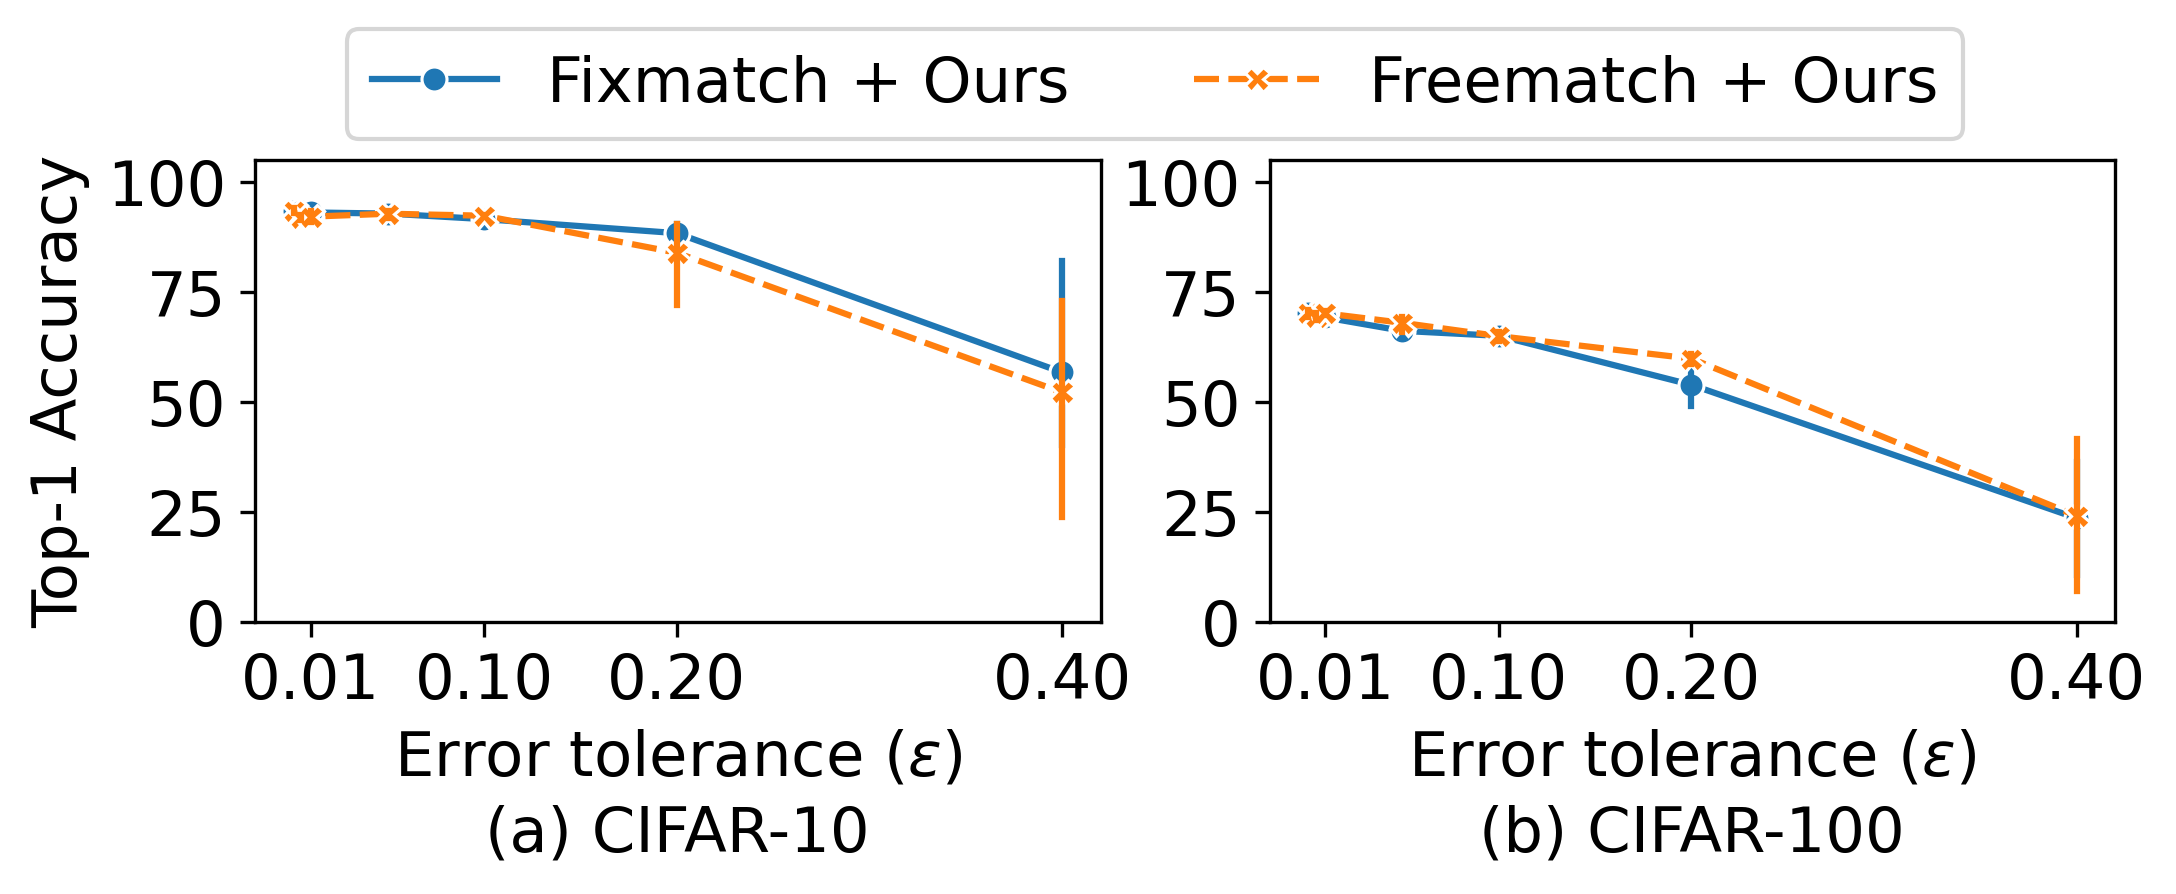

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(8, 2))
sns.lineplot(
    data=results_df[results_df["dataset"] == "cifar10"],
    x="epsilon",
    y="test_top_1_acc",
    hue="method",
    ax=axes[0],
    markers=True,
    style="method",
    err_style="bars",
)

sns.lineplot(
    data=results_df[results_df["dataset"] == "cifar100"],
    x="epsilon",
    y="test_top_1_acc",
    hue="method",
    ax=axes[1],
    markers=True,
    style="method",
    err_style="bars",
)

axes[0].set_title("(a) CIFAR-10", y=-0.55)
axes[1].set_title("(b) CIFAR-100", y=-0.55)
for ax in axes.flatten():
    ax.legend().set_visible(False)
    ax.set_ylabel("Top-1 Accuracy")
    ax.set_xlabel(r"Error tolerance ($\epsilon$)")
    ax.set_ylim(0, 105)
    ax.set_yticks(np.arange(0, 105, 20))
    ax.set_xticks([0.01, 0.1, 0.2, 0.4])
    ax.legend(title=None)
    # Define renaming map
    renaming_map = {
        "fixmatch-ours": "Fixmatch + Ours",
        "freematch-ours": "Freematch + Ours",
    }
    # Rename legend labels
    handles, labels = ax.get_legend_handles_labels()
    new_labels = [renaming_map[label] for label in labels]
    ax.legend(handles, new_labels, title=None)
    ax.legend().set_visible(False)
    ax.tick_params(axis="both", which="major", labelsize=15)
    ax.title.set_size(15)
    ax.xaxis.label.set_size(15)
    ax.yaxis.label.set_size(15)
    ax.set_yticks([0, 25, 50, 75, 100])
fig.legend(
    handles,
    new_labels,
    loc="upper center",
    ncol=2,
    fontsize=15,
    bbox_to_anchor=(0.5, 1.15),
)
axes[1].set_ylabel("")


# plt.tight_layout()
plt.savefig(f"fix_epsilon.pdf", bbox_inches="tight")
plt.show()

In [61]:
results_df.groupby(["method", "dataset", "epsilon"]).test_top_1_acc.std()

method          dataset   epsilon
fixmatch-ours   cifar10   0.001       0.125831
                          0.005       0.438035
                          0.010       0.538710
                          0.050       0.516599
                          0.100       0.950438
                          0.200       2.896442
                          0.400      22.251072
                cifar100  0.001       1.178718
                          0.005       1.163597
                          0.010       1.133946
                          0.050       1.331431
                          0.100       0.335876
                          0.200       8.148159
                          0.400      18.208000
freematch-ours  cifar10   0.001       0.571365
                          0.005       0.826136
                          0.010       1.177214
                          0.050       0.817899
                          0.100       0.162660
                          0.200      10.355745
                          

In [62]:
results_df.groupby(["method", "dataset", "epsilon"]).test_top_1_acc.mean()

method          dataset   epsilon
fixmatch-ours   cifar10   0.001      93.483333
                          0.005      93.325000
                          0.010      93.058333
                          0.050      92.800000
                          0.100      91.541667
                          0.200      88.350000
                          0.400      56.716667
                cifar100  0.001      70.200000
                          0.005      69.816667
                          0.010      69.191667
                          0.050      66.141667
                          0.100      65.012500
                          0.200      53.875000
                          0.400      23.575000
freematch-ours  cifar10   0.001      93.366667
                          0.005      91.875000
                          0.010      92.108333
                          0.050      92.766667
                          0.100      92.316667
                          0.200      83.891667
                          